In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [10]:
train_data_path = '/Users/brindamuralie/Desktop/Sem5/mlprojec/ml/kaggle/input/train'
test_data_path = '/Users/brindamuralie/Desktop/Sem5/mlprojec/ml/kaggle/input/test'

# Create empty lists to store image data and labels
data = []
labels = []

# Loop through the REAL and FAKE subfolders in the train data directory
for folder in os.listdir(train_data_path):
    if folder != '.DS_Store':
        folder_path = os.path.join(train_data_path, folder)
        label = folder  # Label is either 'REAL' or 'FAKE'

        # Loop through the images in each subfolder, considering only the first 100 samples
        for i, filename in enumerate(os.listdir(folder_path)):
            if i >= 10000:
                break  # Break the loop after 100 samples
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (32, 32))  # Resize to 32x32 pixels
            data.append(image)
            labels.append(label)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

Validation
Accuracy (SVM): 0.814
Precision (SVM): 0.8135759960649287
Recall (SVM): 0.8192174343734522
F1-Score (SVM): 0.8163869693978283
Confusion Matrix (SVM):
[[1602  379]
 [ 365 1654]]
Specificity (SVM): 0.8086824835941444
False Positive Rate (SVM): 0.19131751640585562
ROC Curve and AUC-ROC (SVM):


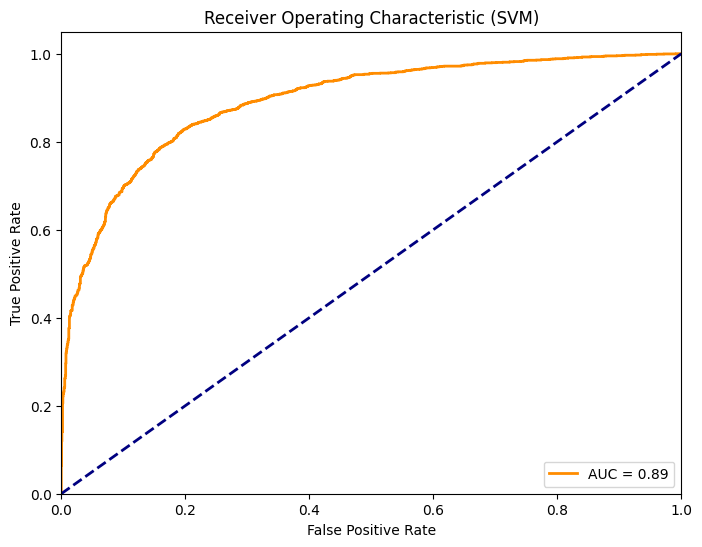

Precision-Recall Curve and AUC-PR (SVM):


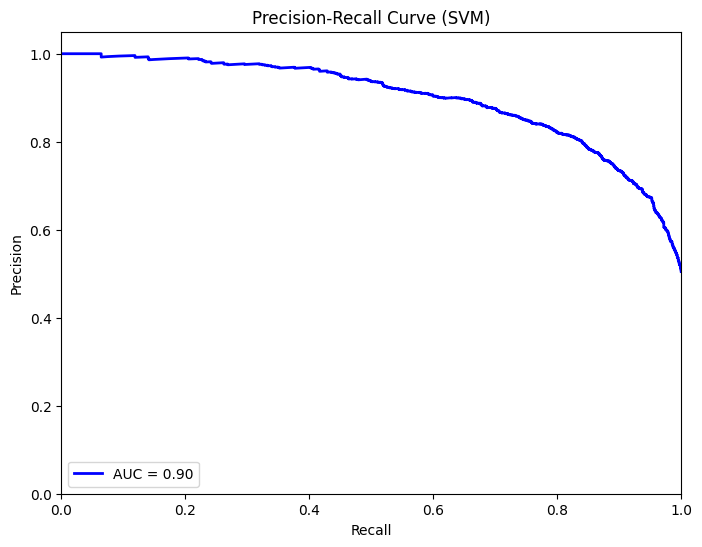

In [11]:
# Train an SVM classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train.reshape(-1, 32 * 32 * 3), y_train)

# Predict on the validation data
y_pred_svm = svm_classifier.predict(X_val.reshape(-1, 32 * 32 * 3))

# Calculate accuracy on validation data
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("Validation")
print(f"Accuracy (SVM): {accuracy_svm}")

# Calculate precision, recall, and F1-Score on validation data for SVM
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)
print(f"Precision (SVM): {precision_svm}")
print(f"Recall (SVM): {recall_svm}")
print(f"F1-Score (SVM): {f1_svm}")

# Calculate the confusion matrix on validation data for SVM
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Calculate specificity and false positive rate on validation data for SVM
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
specificity_svm = tn_svm / (tn_svm + fp_svm)
fpr_svm = fp_svm / (tn_svm + fp_svm)
print(f"Specificity (SVM): {specificity_svm}")
print(f"False Positive Rate (SVM): {fpr_svm}")

# Calculate decision function scores for ROC and Precision-Recall curves
y_scores_svm = svm_classifier.decision_function(X_val.reshape(-1, 32 * 32 * 3))

# Calculate ROC curve and AUC-ROC on validation data for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("ROC Curve and AUC-ROC (SVM):")
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and AUC-PR on validation data for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_val, y_scores_svm)
pr_auc_svm = average_precision_score(y_val, y_scores_svm)
print("Precision-Recall Curve and AUC-PR (SVM):")
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'AUC = {pr_auc_svm:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend(loc='lower left')
plt.show()


In [12]:
# Load and preprocess test data
test_data = []
test_labels = []

for folder in os.listdir(test_data_path):
    folder_path = os.path.join(test_data_path, folder)
    label = folder  # Label is either 'REAL' or 'FAKE'
    if folder != '.DS_Store':
        # Loop through the images in each subfolder
        for i, filename in enumerate(os.listdir(folder_path)):
            if i >= 10000:
                break 
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (32, 32))  # Resize to 32x32 pixels
            test_data.append(image)
            test_labels.append(label)

# Convert test data and labels to NumPy arrays
test_data = np.array(test_data)
test_labels = label_encoder.transform(test_labels)  # Encode test labels

Test
Test Accuracy (SVM): 0.8108
Precision (SVM): 0.8144475920679887
Recall (SVM): 0.805
F1-Score (SVM): 0.8096962381814525
Confusion Matrix (SVM):
[[8166 1834]
 [1950 8050]]
Specificity (SVM): 0.8166
False Positive Rate (SVM): 0.1834
ROC Curve and AUC-ROC (SVM):


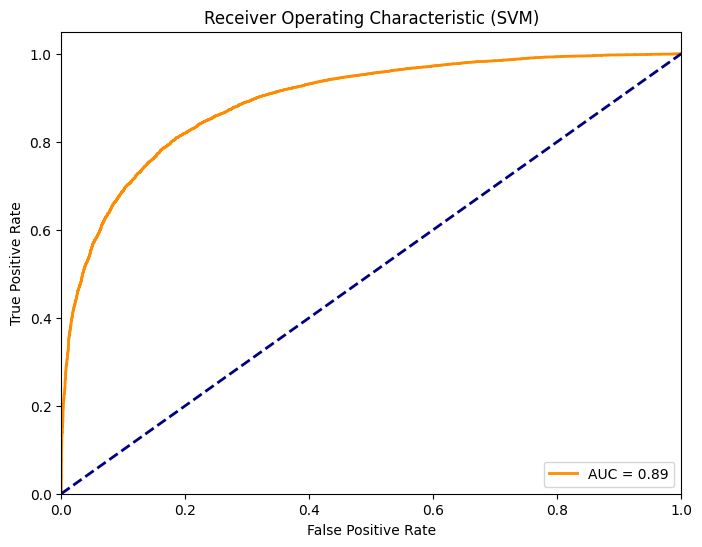

Precision-Recall Curve and AUC-PR (SVM):


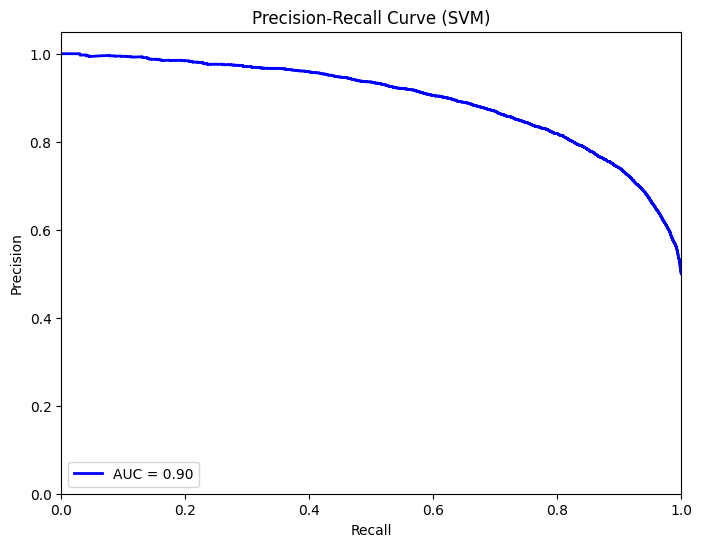

In [13]:
# Predict on the test data using SVM
test_scores_svm = svm_classifier.decision_function(test_data.reshape(-1, 32 * 32 * 3))
test_pred_svm = svm_classifier.predict(test_data.reshape(-1, 32 * 32 * 3))

# Calculate accuracy on the test data using SVM predictions
test_accuracy_svm = accuracy_score(test_labels, test_pred_svm)
print("Test")
print(f"Test Accuracy (SVM): {test_accuracy_svm}")

# Calculate precision, recall, and F1-Score on test data using SVM predictions
precision_svm = precision_score(test_labels, test_pred_svm)
recall_svm = recall_score(test_labels, test_pred_svm)
f1_svm = f1_score(test_labels, test_pred_svm)
print(f"Precision (SVM): {precision_svm}")
print(f"Recall (SVM): {recall_svm}")
print(f"F1-Score (SVM): {f1_svm}")

# Calculate the confusion matrix on test data using SVM predictions
conf_matrix_svm = confusion_matrix(test_labels, test_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Calculate specificity and false positive rate on test data using SVM predictions
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()
specificity_svm = tn_svm / (tn_svm + fp_svm)
fpr_svm = fp_svm / (tn_svm + fp_svm)
print(f"Specificity (SVM): {specificity_svm}")
print(f"False Positive Rate (SVM): {fpr_svm}")

# Calculate ROC curve and AUC-ROC on test data using SVM scores
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_labels, test_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("ROC Curve and AUC-ROC (SVM):")
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curve and AUC-PR on test data using SVM scores
precision_svm, recall_svm, _ = precision_recall_curve(test_labels, test_scores_svm)
pr_auc_svm = average_precision_score(test_labels, test_scores_svm)
print("Precision-Recall Curve and AUC-PR (SVM):")
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'AUC = {pr_auc_svm:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend(loc='lower left')
plt.show()